# Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn

## Configurations
%matplotlib inline

In [ ]:
import pandas as pd

# URL to the raw CSV file
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'

# Use pandas to read the CSV file from the URL
df = pd.read_csv(url)

# Display the first few rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(len(df))
df = df.dropna()
len(df)

1338


1338

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
# df['region'] = df['region'].astype('category')
# df['region'] = df['region'].cat.codes

In [ ]:
region_map = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
sex_map = {'female': 0, 'male': 1}
smoker_map = {'no': 0, 'yes': 1}

df['region'] = df['region'].map(region_map)
df['sex'] = df['sex'].map(sex_map)
df['smoker'] = df['smoker'].map(smoker_map)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [ ]:
formula = 'charges ~ ' + ' + '.join(df.columns.difference(['charges']))
print(formula)
full_model = smf.ols(formula, data=df).fit()
print(full_model.summary())

charges ~ age + bmi + children + region + sex + smoker
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:20:10   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

## Diagonstics

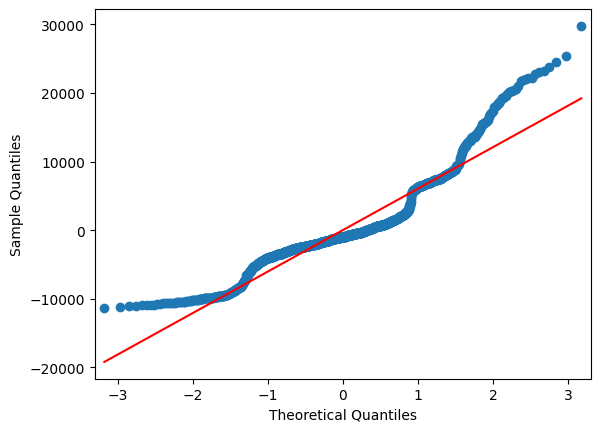

In [ ]:
# plot the qq plot
sm.qqplot(full_model.resid, line='s');

In [ ]:
# compute the shapiro-wilk test
shapiro_test = stats.shapiro(full_model.resid)
print(shapiro_test)

ShapiroResult(statistic=0.8990615606307983, pvalue=8.660521172067415e-29)


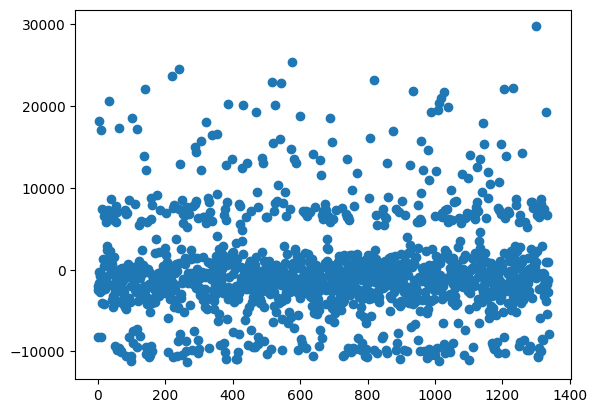

In [ ]:
# scatter plot of residuals vs observation index
plt.scatter(df.index, full_model.resid)

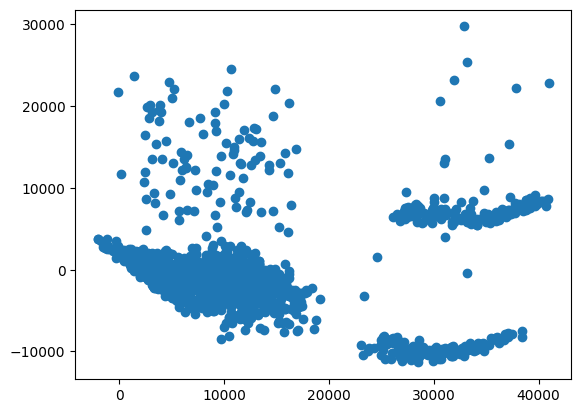

In [ ]:
# scatter plot of residuals vs fitted values
plt.scatter(full_model.fittedvalues, full_model.resid)

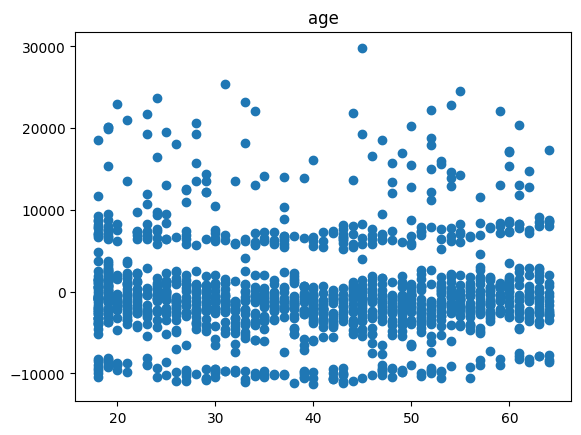

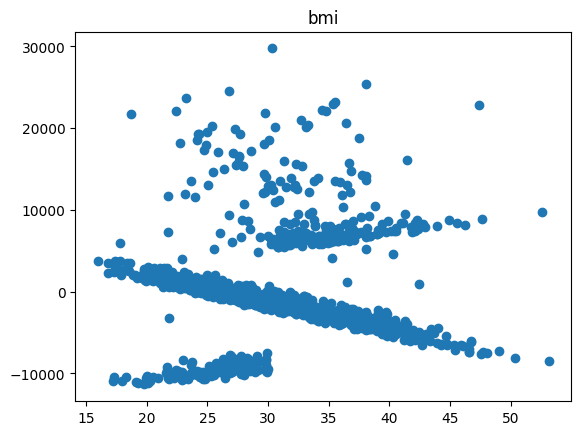

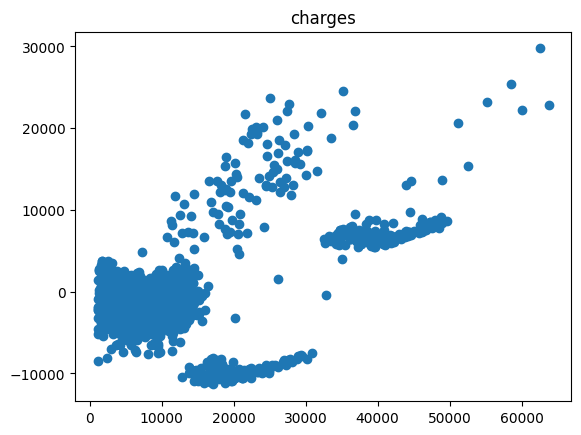

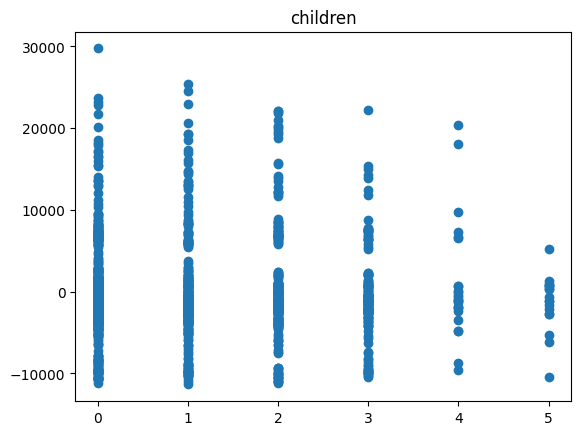

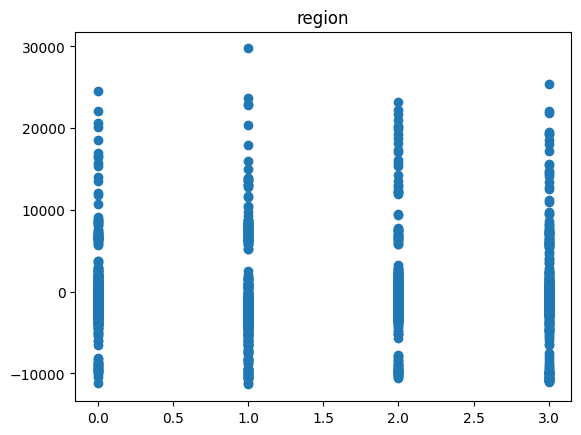

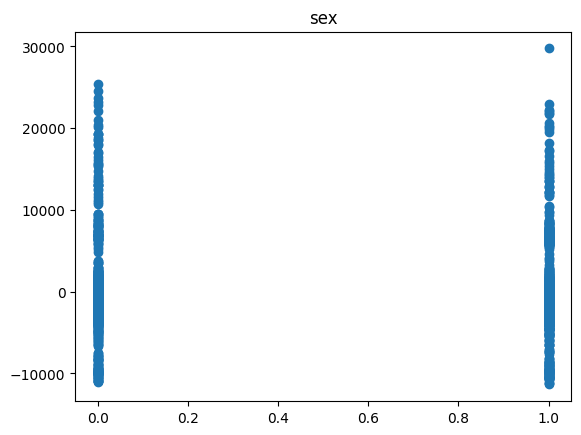

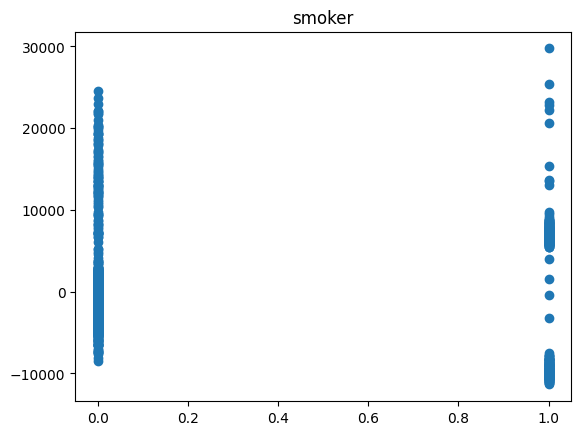

In [ ]:
# scatter plots of residuals vs each predictor
for col in df.columns.difference(['median_house_value']):
    plt.scatter(df[col], full_model.resid)
    plt.title(col)
    plt.show()

In [ ]:
# perform the Breusch-Pagan test
bp_test = sm.stats.diagnostic.het_breuschpagan(full_model.resid, full_model.model.exog)
print(bp_test[3])

6.164307910981725e-25


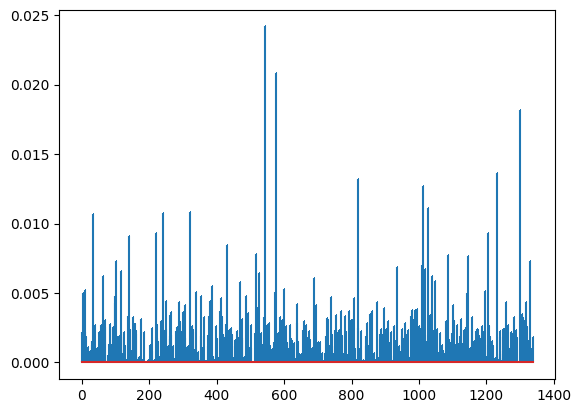

In [ ]:
# cook's distance plot
influence = full_model.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.show()

In [ ]:
# compute the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
exog = full_model.model.exog
names = full_model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i)}')

VIF: age: 1.0153935097117832
VIF: bmi: 1.0406082548384714
VIF: children: 1.002482141253599
VIF: region: 1.0259664746927764
VIF: sex: 1.0088886483091777
VIF: smoker: 1.0064664184011367


In [ ]:
print(full_model.summary())

# compute the meadian according to the ocean_proximity
charges_by_region = df.groupby('region')['charges'].median()
print(charges_by_region)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sat, 09 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:32:40   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.288e+04   1013.505    -12.705      0.0

# Logistic Regression

We will predict `smoker` variable using others.

In [ ]:
formula = 'smoker ~ ' + ' + '.join(df.columns.difference(['smoker']))
print(formula)
model1 = smf.logit(formula, data=df).fit()
print(model1.summary())

smoker ~ age + bmi + charges + children + region + sex
Optimization terminated successfully.
         Current function value: 0.113542
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 smoker   No. Observations:                 1338
Model:                          Logit   Df Residuals:                     1331
Method:                           MLE   Df Model:                            6
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                  0.7760
Time:                        01:39:25   Log-Likelihood:                -151.92
converged:                       True   LL-Null:                       -678.32
Covariance Type:            nonrobust   LLR p-value:                3.403e-224
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9007      1.122      5.260      0.0

In [ ]:
# Identify the covariates which are statistically significant at a 15% significance level.
model1.pvalues[model1.pvalues < 0.15]

Intercept    1.326577e-07
age          4.424557e-14
bmi          9.131188e-16
charges      8.074412e-37
children     5.458372e-02
sex          7.467102e-02
dtype: float64

In [ ]:
formula = 'smoker ~ ' + 'age + bmi + charges + children + sex'

model2 = smf.logit(formula, data=df).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.114041
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 smoker   No. Observations:                 1338
Model:                          Logit   Df Residuals:                     1332
Method:                           MLE   Df Model:                            5
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                  0.7750
Time:                        01:41:31   Log-Likelihood:                -152.59
converged:                       True   LL-Null:                       -678.32
Covariance Type:            nonrobust   LLR p-value:                4.343e-225
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5100      1.058      5.206      0.000       3.436       7.584
age           -0.0998      0

In [ ]:
# Include an interaction term between `sex` and `bmi` in your logistic regression model.

formula = 'smoker ~ ' + 'age + bmi + charges + children + sex + sex:bmi'  # Adding the interaction term

model3 = smf.logit(formula, data=df).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.113501
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 smoker   No. Observations:                 1338
Model:                          Logit   Df Residuals:                     1331
Method:                           MLE   Df Model:                            6
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                  0.7761
Time:                        01:43:24   Log-Likelihood:                -151.86
converged:                       True   LL-Null:                       -678.32
Covariance Type:            nonrobust   LLR p-value:                3.223e-224
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4216      1.300      4.938      0.000       3.873       8.970
age           -0.0997      0

# Confusion Matrix, TPR, FPR, ROC Curve, and AUC Score

## Confusion Matrix
A confusion matrix is a table used to describe the performance of a classification model on a set of data for which the true values are known. It compares the actual target values with those predicted by the model, providing insight into the types of errors made. The matrix is typically structured as follows for a binary classification:

- **True Positives (TP)**: The number of positive instances correctly classified as positive.
- **False Positives (FP)**: The number of negative instances incorrectly classified as positive.
- **True Negatives (TN)**: The number of negative instances correctly classified as negative.
- **False Negatives (FN)**: The number of positive instances incorrectly classified as negative.

The confusion matrix allows for the calculation of several performance metrics, including accuracy, precision, recall, and F1-score.

## True Positive Rate (TPR)
TPR, also known as sensitivity or recall, measures the proportion of actual positives that are correctly identified by the model. It is calculated as:

$$ \text{TPR} = \frac{TP}{TP + FN} $$

TPR is a measure of the model's ability to capture the positive instances.

## False Positive Rate (FPR)
FPR measures the proportion of actual negatives that are incorrectly classified as positives. It is calculated as:

$$ \text{FPR} = \frac{FP}{FP + TN} $$

FPR is a measure of the model's tendency to falsely classify negatives as positives.

## Receiver Operating Characteristic (ROC) Curve
The ROC curve is a graphical representation that displays the performance of a classification model at all classification thresholds. It plots the TPR (on the Y-axis) against the FPR (on the X-axis) at various threshold settings. The curve starts at (0,0) and ends at (1,1). A model that perfectly classifies all positives and negatives would have a ROC curve that goes straight up the Y-axis and then along the X-axis, indicating a high TPR and a low FPR at all thresholds.

## Area Under the ROC Curve (AUC) Score
The AUC score is a single scalar value that summarizes the ROC curve by calculating the area under it. AUC values range from 0 to 1, where:
- A model with perfect prediction has an AUC of 1.
- A model that randomly guesses has an AUC of 0.5.
- A model with an AUC less than 0.5 is performing worse than random guessing, suggesting a problem with the model.


In [ ]:
# print the confusion matrix of the model3
from sklearn.metrics import confusion_matrix
y_pred = model3.predict(df)
y_pred = (y_pred > 0.5).astype(int)
confusion_matrix(df['smoker'], y_pred)

array([[1025,   39],
       [  17,  257]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df['smoker'], y_pred)

0.9581464872944694

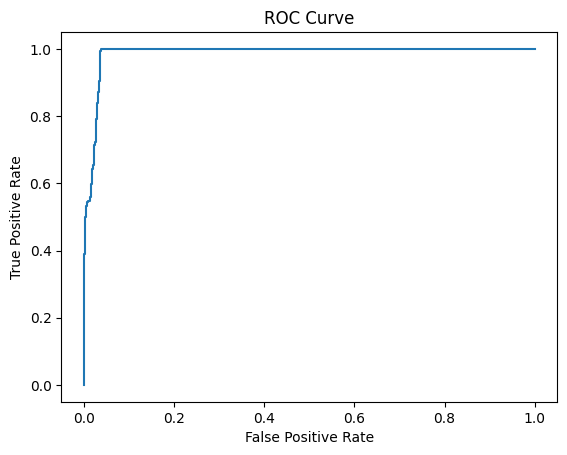

In [ ]:
# plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(df['smoker'], model3.predict(df))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# compute the AUC
roc_auc_score(df['smoker'], model3.predict(df))

0.9870376214258274